## Submission for Test Data

### Perform same data cleaning, feature engineering steps and 

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 50)
from datetime import datetime
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 

style.use('fivethirtyeight')

In [2]:
sales_test_original_df = pd.read_csv('./Data/test_data_cleaned.csv')
sales_test_df = sales_test_original_df.copy()

In [3]:
sales_test_df.head(2)

,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,description,difficulty,dish_type,heat_level,fat,is_classic,number_of_ingredients_per_recipe,preferences,carbs_content,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales
0,201945,38287,Juicy Lucy Meatloaf,2 person,990.0,65.0,time_level_5,mexican,Just when you thought meatloaf couldn't get an...,easy,meat,no_heat,64.0,No,9,"beef,dairy","potato,panko_and_breadcrumbs",meat_and_side,NaN,"beef,dairy",42.0,main,NaN,kid_friendly,0.0,ground_mince,NaN
1,201945,38309,Baja-Style Cauliflower Tacos,2 person,790.0,60.0,time_level_4,mexican,Pico de gallo is a Mexican salsa made from cho...,easy,veggie,no_heat,58.0,No,9,dairy,tortillas_and_wraps,tacos_tortillas_dishes,all_seasons,dairy,12.0,main,NaN,quick,0.0,no_cut,NaN


In [4]:
sales_test_df['year_week'] = sales_test_df['year_week'].astype(str)
sales_test_df['year'] = sales_test_df['year_week'].apply(lambda x: x[:4])
sales_test_df['week'] = sales_test_df['year_week'].apply(lambda x: x[-2:])

In [5]:
sales_test_df['year'] = sales_test_df.year.astype(int)
sales_test_df['week'] = sales_test_df.week.astype(int)

In [6]:
def year_week(y, w):
    return datetime.strptime(f'{y} {w} 1', '%G %V %u')
    
sales_test_df['year_week_ts'] = sales_test_df.apply(lambda row: year_week(row.year, row.week), axis=1)

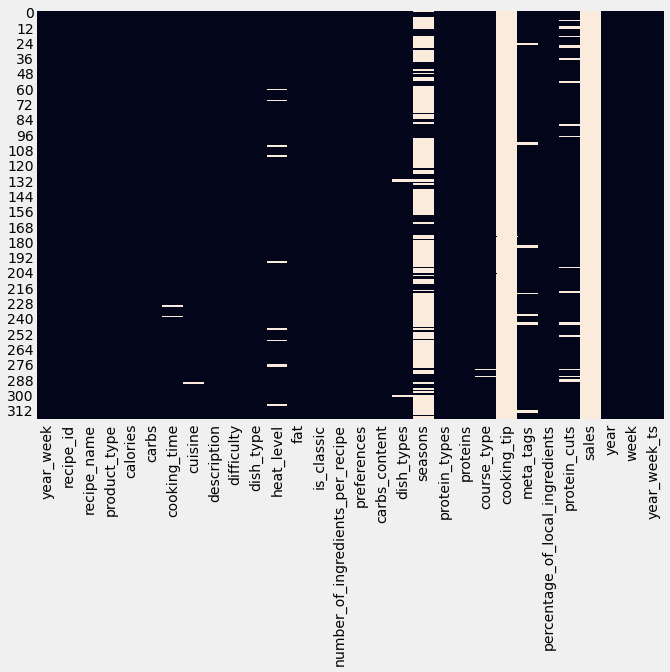

In [7]:
plt.figure(figsize = (10,7))
sns.heatmap(sales_test_df.isnull(), cbar=False)
plt.show()

In [8]:
sales_test_df = sales_test_df.drop('cooking_tip',axis =1)
sales_test_df['protein_cuts'] = sales_test_df.protein_cuts.fillna('no_cut')
sales_test_df['meta_tags'] = sales_test_df['meta_tags'].fillna('quick')
sales_test_df['cuisine'] = sales_test_df['cuisine'].fillna('new_american')
sales_test_df['dish_types'] = sales_test_df['dish_types'].fillna('meat_and_side')
sales_test_df['heat_level'] = sales_test_df['heat_level'].fillna('no_heat')
sales_test_df = sales_test_df.drop('percentage_of_local_ingredients',axis =1)
sales_test_df = sales_test_df.drop('difficulty',axis =1)
sales_test_df['cooking_time'] = sales_test_df['cooking_time'].fillna('time_level_4')
sales_test_df['seasons'] = sales_test_df['seasons'].fillna('all_seasons')
sales_test_df['course_type'] = sales_test_df['course_type'].fillna('main')

In [9]:
import holidays

de_holidays = holidays.Germany()

def check_no_of_holidays_in_week(week_start_date):
    datelist = pd.date_range(week_start_date, periods=7).tolist()
    count = 0
    for date in datelist:
        if de_holidays.get(date):
            count+=1
    return count

    
sales_test_df['no_of_holidays'] = sales_test_df.year_week_ts.apply(check_no_of_holidays_in_week)

In [10]:
sales_test_df = sales_test_df.drop(['recipe_name','year_week'],axis=1).reset_index(drop=True)

In [11]:
sales_test_df = sales_test_df.drop(['year'],axis=1).reset_index(drop=True)

In [12]:
sales_test_df = sales_test_df.drop(['description'],axis=1).reset_index(drop=True)

In [13]:
sales_test_df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 320 entries, 0 to 319
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   recipe_id                         320 non-null    int64         
 1   product_type                      320 non-null    object        
 2   calories                          320 non-null    float64       
 3   carbs                             320 non-null    float64       
 4   cooking_time                      320 non-null    object        
 5   cuisine                           320 non-null    object        
 6   dish_type                         320 non-null    object        
 7   heat_level                        320 non-null    object        
 8   fat                               320 non-null    float64       
 9   is_classic                        320 non-null    object        
 10  number_of_ingredients_per_recipe  32

### Now data is ready to be fed into the model.

In [14]:
from pycaret.regression import *

saved_model = load_model('./Models/catboost_sales_prediction_model')

Transformation Pipeline and Model Successfully Loaded


In [15]:
predictions = predict_model(saved_model, data=sales_test_df)

In [16]:
predictions = predictions.drop(['sales'],axis=1)

In [22]:
predictions.head(10)

,recipe_id,product_type,calories,carbs,cooking_time,cuisine,dish_type,heat_level,fat,is_classic,number_of_ingredients_per_recipe,preferences,carbs_content,dish_types,seasons,protein_types,proteins,course_type,meta_tags,protein_cuts,week,year_week_ts,no_of_holidays,Label
index,,,,,,,,,,,,,,,,,,,,,,,,
0,38287,2 person,990.0,65.0,time_level_5,mexican,meat,no_heat,64.0,No,9,"beef,dairy","potato,panko_and_breadcrumbs",meat_and_side,all_seasons,"beef,dairy",42.0,main,kid_friendly,ground_mince,45,2019-11-04,0,2652.1679
1,38309,2 person,790.0,60.0,time_level_4,mexican,veggie,no_heat,58.0,No,9,dairy,tortillas_and_wraps,tacos_tortillas_dishes,all_seasons,dairy,12.0,main,quick,no_cut,45,2019-11-04,0,855.9102
2,38310,family,690.0,60.0,time_level_4,mexican,veggie,no_heat,46.0,No,9,dairy,tortillas_and_wraps,tacos_tortillas_dishes,all_seasons,dairy,12.0,main,quick,no_cut,45,2019-11-04,0,171.8674
3,38311,2 person,830.0,57.0,time_level_3,new_american,veggie,no_heat,59.0,No,6,dairy,pasta_incl_gnocchi_spatzle,pasta,all_seasons,dairy,20.0,main,"kid_friendly,quick",no_cut,45,2019-11-04,0,2495.8560
4,38312,family,770.0,51.0,time_level_3,new_american,veggie,no_heat,55.0,No,6,dairy,pasta_incl_gnocchi_spatzle,pasta,all_seasons,dairy,20.0,main,"kid_friendly,quick",no_cut,45,2019-11-04,0,475.0278
5,38313,2 person,800.0,113.0,time_level_4,new_american,veggie,no_heat,37.0,No,6,dairy,pasta_incl_gnocchi_spatzle,"pasta,one_pot",all_seasons,dairy,17.0,main,"kid_friendly,quick",no_cut,45,2019-11-04,0,2110.3123
6,38314,family,680.0,105.0,time_level_4,new_american,veggie,no_heat,27.0,No,6,dairy,pasta_incl_gnocchi_spatzle,"pasta,one_pot",all_seasons,dairy,13.0,main,"kid_friendly,quick",no_cut,45,2019-11-04,0,328.5961
7,38315,2 person,620.0,17.0,time_level_4,new_american,fish,no_heat,47.0,No,6,fish,gluten_free_grains,fish_and_side,all_seasons,fish,33.0,main,"quick,healthy_choice",no_cut,45,2019-11-04,0,1872.7004
8,38317,2 person,810.0,59.0,time_level_5,mediterranean,meat,no_heat,49.0,No,8,"dairy,pork",sweet_potato,meat_and_side,all_seasons,"dairy,pork",37.0,main,healthy_choice,tenderloin,45,2019-11-04,0,3299.6227


In [19]:
sales_test_original_df['sales'] = predictions.Label

In [21]:
sales_test_original_df.to_csv('./Data/test_data_submission.csv',index=False)